In [34]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [26]:
mydict = np.load('dsec_data.npy',allow_pickle=True)

## load the data

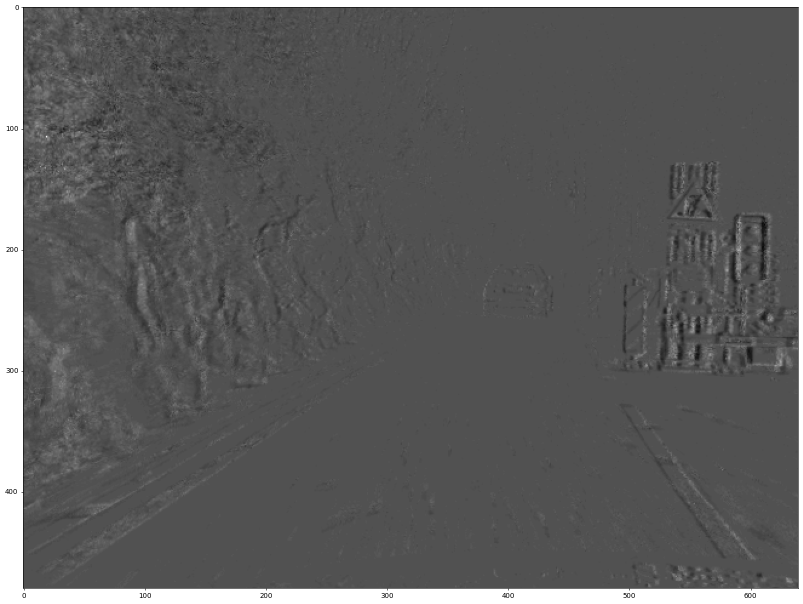

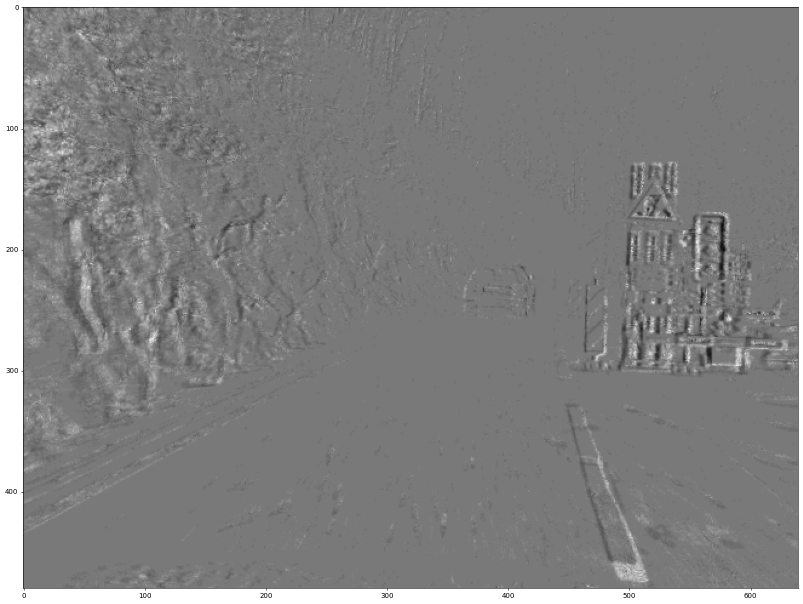

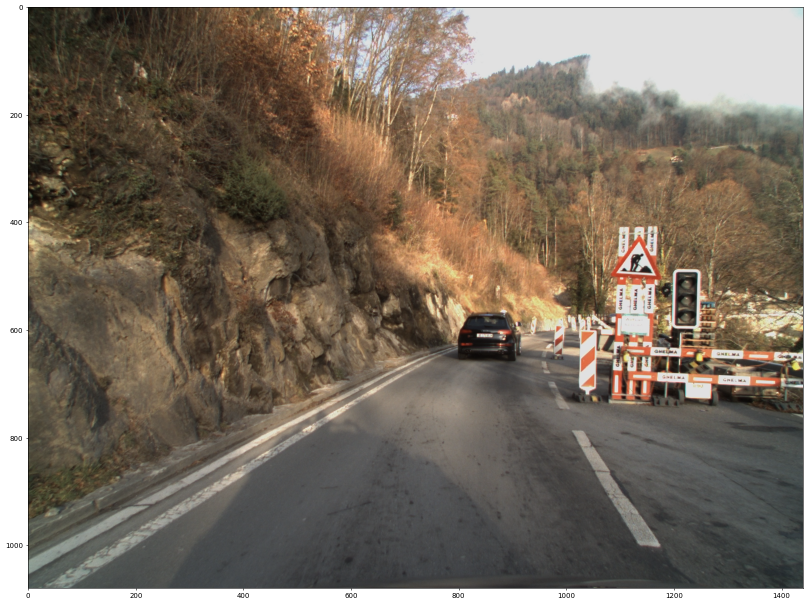

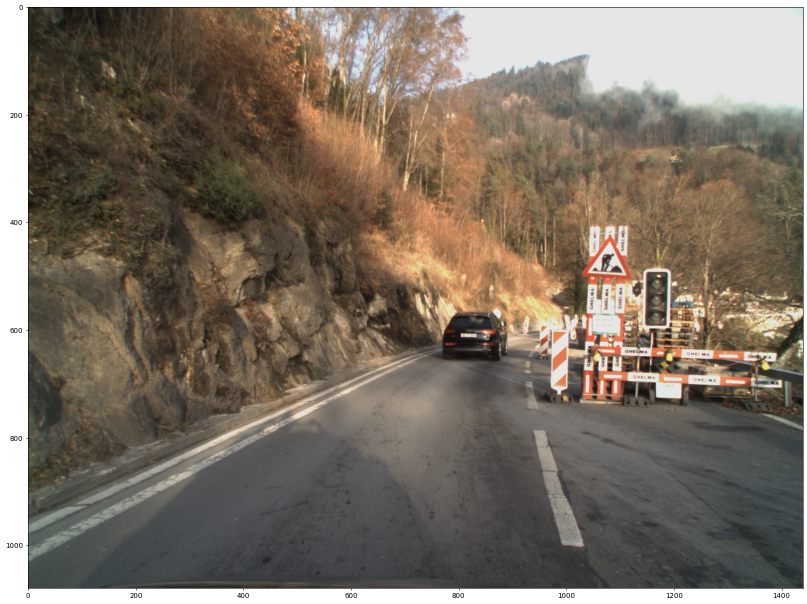

In [33]:
# interlaken_00_c/events/left/events.h5, first 25ms, ts_end=51805200790
left_event = mydict.item()['left_event']
left_event = np.squeeze(left_event)
plt.figure(figsize=(20,20), dpi=50)
plt.imshow(left_event,cmap='gray')

# interlaken_00_c/events/right/events.h5, first 25ms, ts_end=51805200790
right_event = mydict.item()['right_event']
right_event = np.squeeze(right_event)
plt.figure(figsize=(20,20), dpi=50)
plt.imshow(right_event,cmap='gray')

# interlaken_00_c/interlaken_00_c_images_rectified_left/000000.png
left_img = mydict.item()['left_img']
left_img = np.squeeze(left_img)
plt.figure(figsize=(20,20), dpi=50)
plt.imshow(left_img[:,:,[2,1,0]],cmap='gray')

# interlaken_00_c/interlaken_00_c_images_rectified_right/000000.png
right_img = mydict.item()['right_img']
right_img = np.squeeze(right_img)
plt.figure(figsize=(20,20), dpi=50)
plt.imshow(right_img[:,:,[2,1,0]],cmap='gray')

## Fov compare before warp

left cameras original
right cameras original


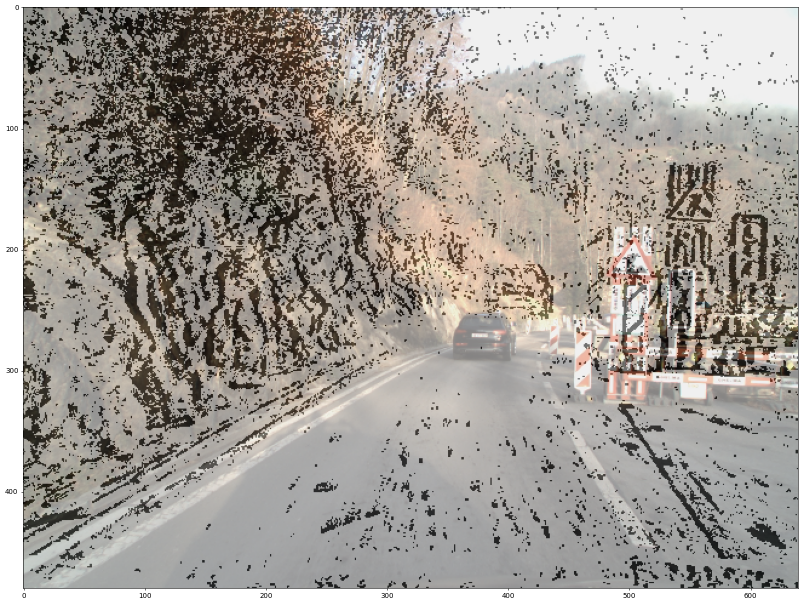

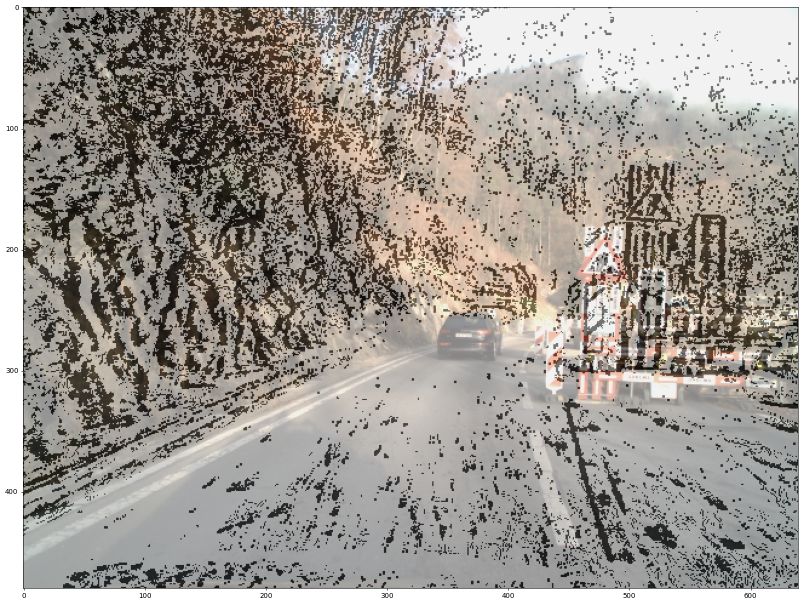

In [51]:
h,w = left_event.shape
left_event_b = left_event*127/abs(left_event).max()+127
ret,left_event_b=cv2.threshold(left_event_b,126,255,cv2.THRESH_BINARY)

left_img_small = cv2.resize(left_img, (w,h))
left_event_3c = np.repeat(left_event_b[:,:,np.newaxis], 3, axis=2)
hikaku = cv2.addWeighted(left_img_small[:,:,[2,1,0]].astype(np.float64), 0.5, (left_event_3c).astype(np.float64), 0.5, 0)

plt.figure(figsize=[20,20], dpi=50)
plt.imshow(hikaku.astype(np.uint8))
print("left cameras original")

right_event_b = right_event*127/abs(right_event).max()+127
ret,right_event_b=cv2.threshold(right_event_b,126,255,cv2.THRESH_BINARY)

right_img_small = cv2.resize(right_img, (w,h))
right_event_3c = np.repeat(right_event_b[:,:,np.newaxis], 3, axis=2)
hikaku2 = cv2.addWeighted(right_img_small[:,:,[2,1,0]].astype(np.float64), 0.5, (right_event_3c).astype(np.float64), 0.5, 0)

plt.figure(figsize=[20,20], dpi=50)
plt.imshow(hikaku2.astype(np.uint8))
print("right cameras original")

## Fov compare after warp

In [41]:
Kr1 = np.array([
    [1164.6238115833075, 0, 713.5791168212891],
    [0, 1164.6238115833075, 570.9349365234375],
    [0,0,1]
])

Kr2 = np.array([
    [1164.6238115833075, 0, 713.5791168212891],
    [0, 1164.6238115833075, 570.9349365234375],
    [0,0,1]
])

T32 = np.array([
    [0.9999880111304372, -0.003533401537847065, -0.003390083916194203, -0.04551026028184807],
    [0.003476600244706753, 0.9998558803824363, -0.016617211420558598, -0.001048727690114844],
    [0.0034483106189848347, 0.016605226232405814, 0.999856177465359, 0.013554100781902953],
    [0.0, 0.0, 0.0, 1.0]
])

T10 = np.array([
    [0.9996874046885865, 0.009652146488870916, 0.023063585478994113, -0.04410263392688484],
    [-0.009722042371104245, 0.9999484753460813, 0.0029203673010648615, 0.0005281285423087664],
    [-0.023034209322743096, -0.0031436795631953228, 0.9997297347181744, -0.01229891454144492],
    [0,0,0,1]
])

R_rect2 = np.array([
    [0.9999366804437944, 0.003969348920710642, -0.010529927454197178],
    [-0.004003571037888531, 0.9999867662646432, -0.0032308999561175607],
    [0.010516963534670165, 0.003272852689552886, 0.99993933911677]
])

R_rect3 = np.array([
    [0.9999322651093031, 0.008652073287418781, -0.0077850382919819015],
    [-0.008624936114678652, 0.9999566349120226, 0.003512658884929655],
    [0.007815092475217568, -0.0034452754974453855, 0.9999635265380186]
])

R_rect1 = np.array([
    [0.9998572179847892, -0.013025778024398856, -0.010764420587133948],
    [0.013060715513432202, 0.9999096430275752, 0.003181743349841093],
    [0.01072200326407413, -0.0033218800890692088, 0.9999369998948329]
])

R_rect0 = np.array([
    [0.9999313912417018, -0.0023139054373197965, 0.011482972222461762],
    [0.002353841678837691, 0.9999912245858043, -0.003465570766066675],
    [-0.011474852451585301, 0.0034923620961737592, 0.9999280629966356]
])

left cameras after
right cameras after


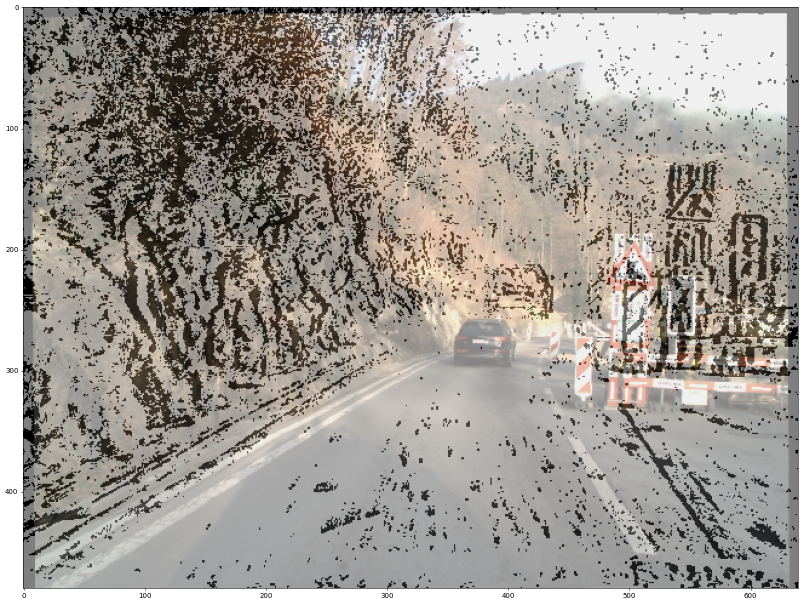

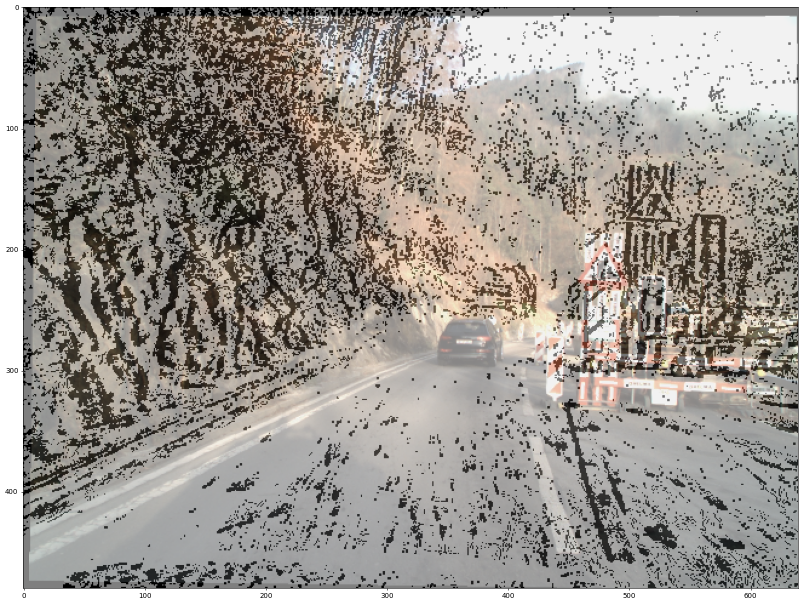

In [58]:
hb, wb, _ = left_img.shape
def myWarpPerspective(R, K, mysize, img):
    '''
    R: transformation matrix
    K: img intrinsics
    size: img size
    img: input img
    '''
    M = np.matmul(np.matmul(K, R), np.linalg.inv(K))
    return cv2.warpPerspective(img, M, mysize, flags=cv2.WARP_INVERSE_MAP)
    

left_img_c1 = myWarpPerspective(np.linalg.inv(R_rect1), Kr1, (wb,hb), left_img) 
left_img_c0 = myWarpPerspective(np.linalg.inv(T10[:3,:3]), Kr1, (wb,hb), left_img_c1)
left_img_cr0 = myWarpPerspective(R_rect0, Kr1, (wb,hb), left_img_c0)

left_img_cr0_small = cv2.resize(left_img_cr0, (w,h))
hikaku3 = cv2.addWeighted(left_img_cr0_small[:,:,[2,1,0]].astype(np.float64), 0.5, (left_event_3c).astype(np.float64), 0.5, 0)

plt.figure(figsize=[20,20], dpi=50)
plt.imshow(hikaku3.astype(np.uint8))
print("left cameras after")

right_img_c2 = myWarpPerspective(np.linalg.inv(R_rect2), Kr2, (wb,hb), right_img)
right_img_c3 = myWarpPerspective(T32[:3,:3], Kr2, (wb,hb), right_img_c2)
right_img_cr3 = myWarpPerspective(R_rect3, Kr2, (wb,hb), right_img_c3)

right_img_cr3_small = cv2.resize(right_img_cr3, (w,h))
hikaku4 = cv2.addWeighted(right_img_cr3_small[:,:,[2,1,0]].astype(np.float64), 0.5, (right_event_3c).astype(np.float64), 0.5, 0)

plt.figure(figsize=[20,20], dpi=50)
plt.imshow(hikaku4.astype(np.uint8))
print("right cameras after")